In [ ]:
!pip install shap

X_test shape: (201, 21)
SHAP values shape: (201, 21)


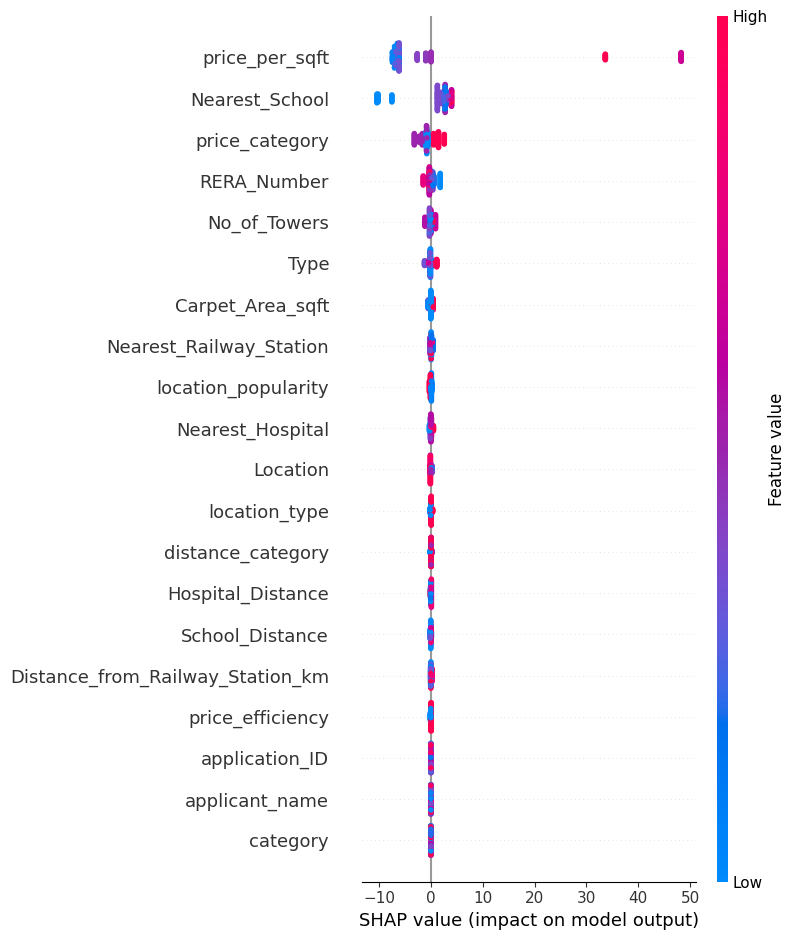

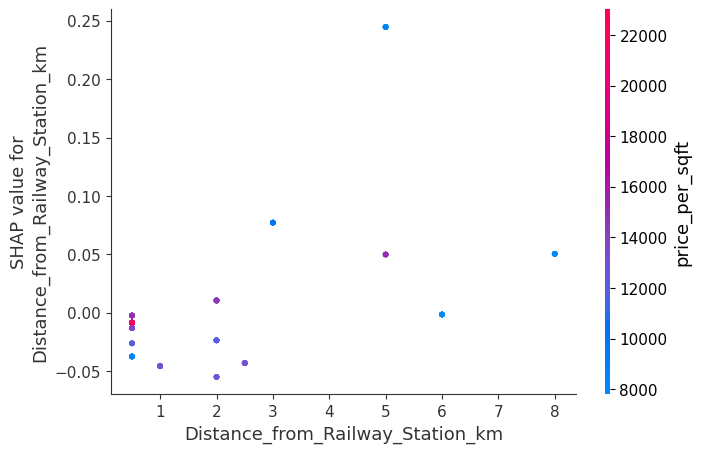

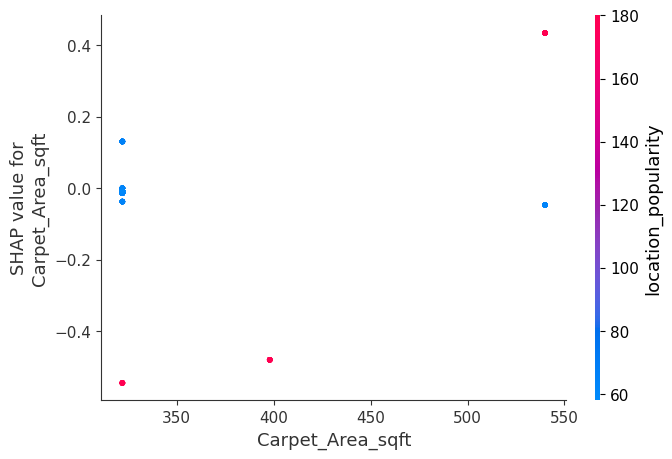

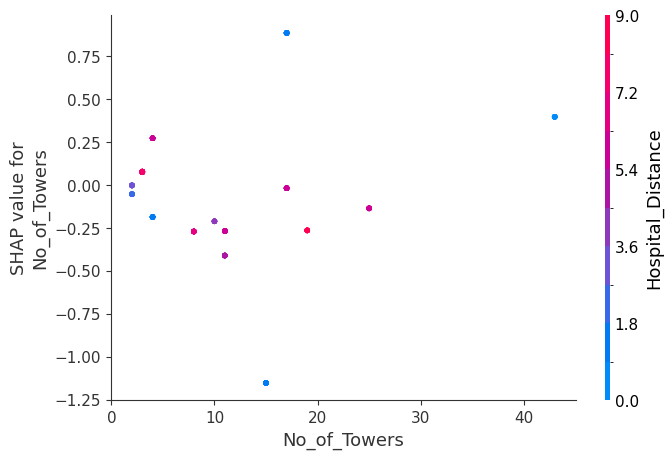

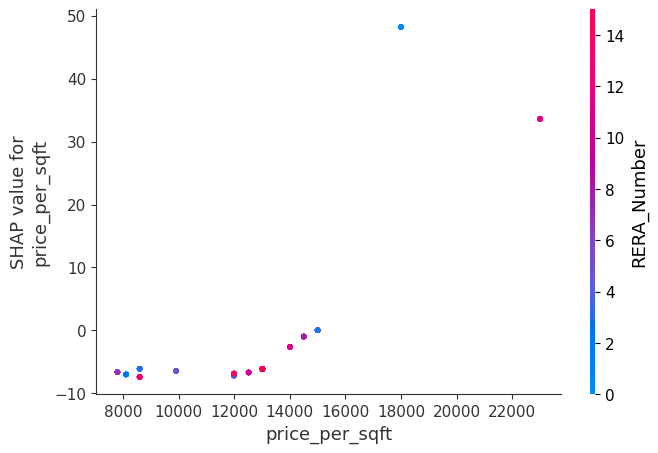

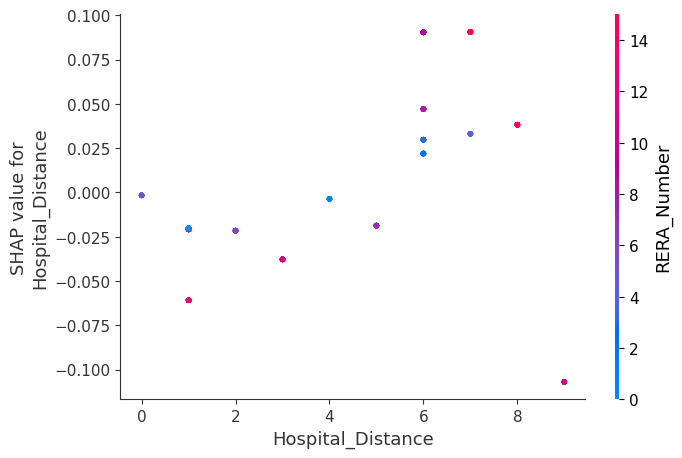

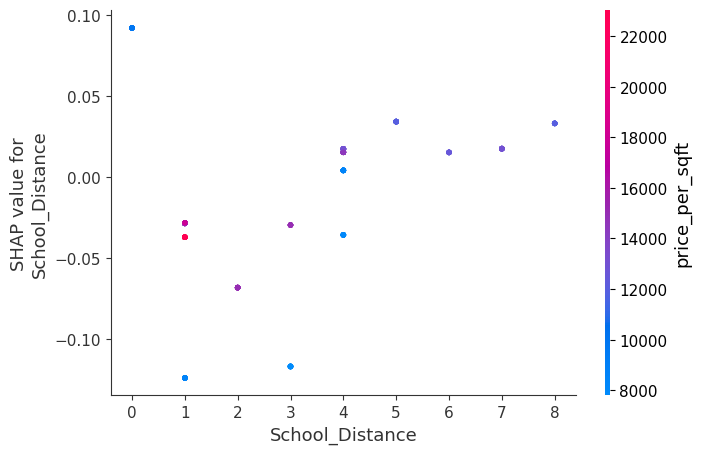

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv("/content/CIDCO FINAL DATASET(1).csv")  # Replace with your dataset path

# Step 3: Separate features and target
target_column = "Price_lakhs"  # Use numeric target for regression
X = df.drop(columns=[target_column])
y = df[target_column]

# Step 4: Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Step 5: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Step 6: Train Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 7: Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Step 8: Check shapes
print("X_test shape:", X_test.shape)
print("SHAP values shape:", shap_values.shape)  # Should match X_test: (num_samples, num_features)

# Step 9: Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

# Step 10: Dependence plots for key numeric features
numeric_features = [
    "Distance_from_Railway_Station_km",
    "Carpet_Area_sqft",
    "No_of_Towers",
    "price_per_sqft",
    "Hospital_Distance",
    "School_Distance"
]


for feature in numeric_features:
    shap.dependence_plot(feature, shap_values, X_test)


In [ ]:
#LIME

In [ ]:
!pip install lime


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import lime
import lime.lime_tabular


In [ ]:
# Load dataset
df = pd.read_csv("/content/CIDCO FINAL DATASET(1).csv")  # Replace with your dataset path

# Target and features
target_column = "Price_lakhs"
X = df.drop(columns=[target_column])
y = df[target_column]

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [ ]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)


In [ ]:
# Select a sample to explain
i = 0  # first row in X_test
sample = X_test.iloc[i].values

# Generate explanation
exp = explainer.explain_instance(
    data_row=sample,
    predict_fn=model.predict,
    num_features=10  # top 10 features contributing to prediction
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Show explanation in notebook
exp.show_in_notebook(show_table=True)


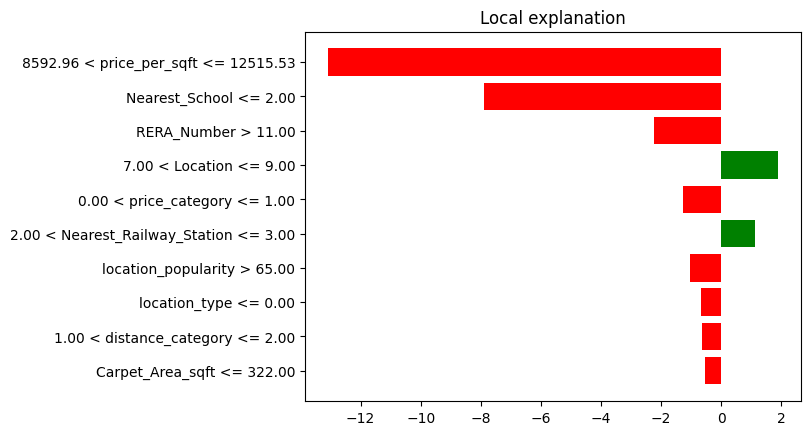

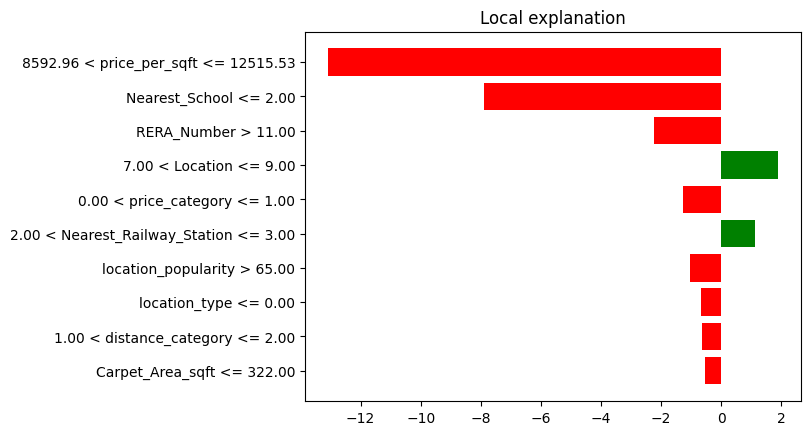

In [ ]:
# Plot feature contributions
exp.as_pyplot_figure()


In [ ]:
#fairlearn


In [ ]:
!pip install fairlearn


In [ ]:
from sklearn.metrics import mean_absolute_error
from fairlearn.metrics import MetricFrame, selection_rate


In [ ]:
# Load dataset
df = pd.read_csv("/content/CIDCO FINAL DATASET(1).csv")  # Replace with your dataset path

# Target and features
target_column = "Price_lakhs"
X = df.drop(columns=[target_column])
y = df[target_column]

# Encode categorical features
X_encoded = X.copy()
sensitive_column = 'Location'  # Example sensitive attribute
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [ ]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [ ]:
# Extract sensitive attribute for test set
sensitive_features = X_test[sensitive_column]


In [ ]:
# MetricFrame for regression metrics across sensitive groups
regression_metrics = MetricFrame(
    metrics=mean_absolute_error,   # performance metric
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_features
)

print("Mean Absolute Error per group:")
print(regression_metrics.by_group)


Mean Absolute Error per group:
Location
0     7.105427e-14
1     9.947598e-14
2     9.947598e-14
3     4.618528e-14
4     6.039613e-14
5     4.618528e-14
6     2.131628e-14
7     5.296773e-14
8     7.105427e-14
9     5.684342e-14
10    7.815970e-14
11    2.842171e-14
12    5.684342e-14
13    8.526513e-14
Name: mean_absolute_error, dtype: float64


In [ ]:
# Example: define a “high price” threshold
high_price_threshold = y_test.median()
y_high = (y_pred > high_price_threshold).astype(int)

fairness_metrics = MetricFrame(
    metrics=selection_rate,  # selection rate per group
    y_true=(y_test > high_price_threshold).astype(int),
    y_pred=y_high,
    sensitive_features=sensitive_features
)

print("Selection rate per group:")
print(fairness_metrics.by_group)

# Compute differences
print("Demographic parity difference:", fairness_metrics.difference())


Selection rate per group:
Location
0     0.000000
1     1.000000
2     1.000000
3     0.000000
4     0.000000
5     0.000000
6     1.000000
7     0.681818
8     0.000000
9     1.000000
10    0.000000
11    1.000000
12    1.000000
13    1.000000
Name: selection_rate, dtype: float64
Demographic parity difference: 1.0


In [ ]:
!pip install fairlearn imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, selection_rate
from imblearn.over_sampling import SMOTE


In [ ]:
# Assume df is your dataset
# Target column: 'price_category'
# Sensitive attribute: choose one, e.g., 'Location'
sensitive_column = 'Location'

X = df.drop(columns=['price_category'])
y = df['price_category']

# Encode all categorical features in X
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Convert to binary: high = 1, others = 0
y_train_binary = (y_train == 'high').astype(int)
y_test_binary  = (y_test == 'high').astype(int)

print("Classes in binary target:", np.unique(y_train_binary))


Classes in binary target: [0 1]


In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train_binary)

print("Before balancing:", y_train_binary.value_counts().to_dict())
print("After balancing:", pd.Series(y_train_res).value_counts().to_dict())


Before balancing: {0: 560, 1: 240}
After balancing: {1: 560, 0: 560}


In [ ]:
base_model = RandomForestClassifier(random_state=42)
constraint = DemographicParity()

fair_model = ExponentiatedGradient(
    estimator=base_model,
    constraints=constraint
)

fair_model.fit(
    X_train_res,
    y_train_res,
    sensitive_features=X_train_res[sensitive_column]
)

y_pred_fair = fair_model.predict(X_test)
print("Fair model accuracy:", accuracy_score(y_test_binary, y_pred_fair))


Fair model accuracy: 0.4975124378109453


In [ ]:
from fairlearn.postprocessing import ThresholdOptimizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Base model (already trained or you can fit a new one)
base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train_res, y_train_res)  # fit on resampled data

# Convert y labels to binary if not already (0 or 1)
# Ensure y_train_res and y_test_binary are already 0/1

# Step 6a: Remove degenerate groups
valid_groups = []
for group in X_train_res[sensitive_column].unique():
    labels_in_group = y_train_res[X_train_res[sensitive_column] == group]
    if len(labels_in_group.unique()) > 1:  # only keep groups with both 0 and 1
        valid_groups.append(group)

# Filter training set
X_train_valid = X_train_res[X_train_res[sensitive_column].isin(valid_groups)]
y_train_valid = y_train_res[X_train_valid.index]

# Step 6b: Initialize ThresholdOptimizer
postprocessor = ThresholdOptimizer(
    estimator=base_model,
    constraints="demographic_parity",
    predict_method="predict_proba",
    prefit=True
)

# Step 6c: Fit postprocessor on valid groups only
postprocessor.fit(
    X_train_valid,
    y_train_valid,
    sensitive_features=X_train_valid[sensitive_column]
)

# Step 6d: Predict on test set
# Note: If test set has groups not in training, remove or merge them
X_test_valid = X_test[X_test[sensitive_column].isin(valid_groups)]
y_test_valid = y_test_binary[X_test_valid.index]

y_pred_post = postprocessor.predict(
    X_test_valid,
    sensitive_features=X_test_valid[sensitive_column]
)

# Step 6e: Evaluate accuracy
print("Post-processed accuracy:", accuracy_score(y_test_valid, y_pred_post))


Post-processed accuracy: 1.0


In [ ]:
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import accuracy_score

# Step 7a: Use the filtered test set from Step 6
# Make sure X_test_valid and y_test_valid are used
# These were filtered to include only valid groups with both 0 and 1 labels

# Evaluate accuracy by sensitive group
metric_frame = MetricFrame(
    metrics=accuracy_score,
    y_true=y_test_valid,
    y_pred=y_pred_post,
    sensitive_features=X_test_valid[sensitive_column]
)

print("Accuracy by sensitive group:")
print(metric_frame.by_group)

# Evaluate selection rate (proportion predicted as 1) by sensitive group
selection = MetricFrame(
    metrics=selection_rate,
    y_true=y_test_valid,
    y_pred=y_pred_post,
    sensitive_features=X_test_valid[sensitive_column]
)

print("\nSelection rate by sensitive group:")
print(selection.by_group)


Accuracy by sensitive group:
Location
7    1.0
Name: accuracy_score, dtype: float64

Selection rate by sensitive group:
Location
7    0.625
Name: selection_rate, dtype: float64
